# Лабораторная работа №2. Кластеризация
###### Выполнил студент группы ПВ202 Нехаенко Владимир
###### Вариант 9. Данные о смертности при сердечной недостаточности (heart_failure_clinical_records_dataset.csv)

In [664]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('heart_failure_clinical_records_dataset.csv').drop(columns=['time', 'DEATH_EVENT'])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


## Предварительная визуализация

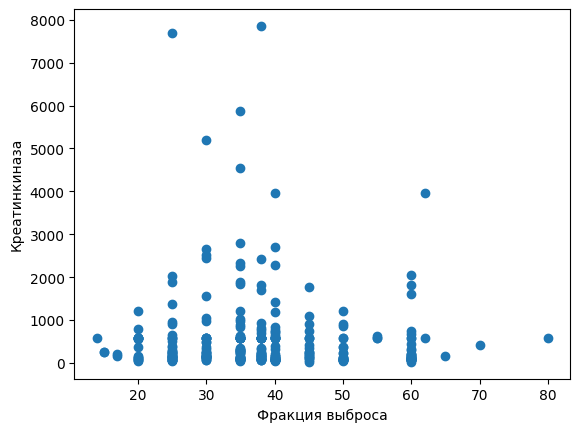

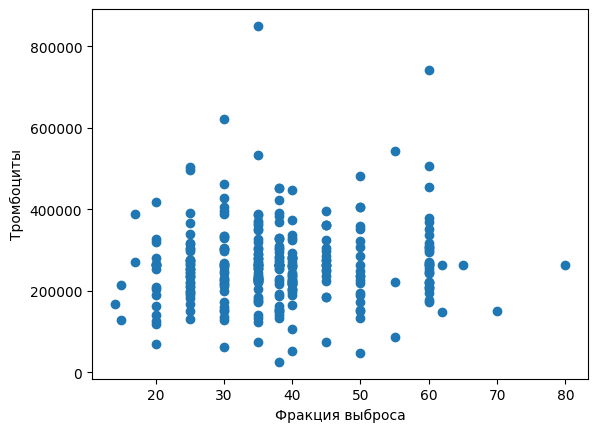

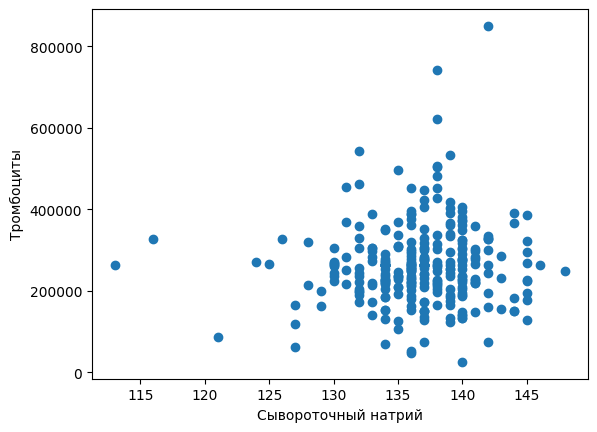

In [665]:
def print_graphics(data_frame, clustering_labels=None):
    plt.xlabel('Фракция выброса')
    plt.ylabel('Креатинкиназа')
    plt.scatter(data_frame['ejection_fraction'], data_frame['creatinine_phosphokinase'], c=clustering_labels)
    plt.show()

    plt.xlabel('Фракция выброса')
    plt.ylabel('Тромбоциты')
    plt.scatter(data_frame['ejection_fraction'], data_frame['platelets'], c=clustering_labels)
    plt.show()

    plt.xlabel('Сывороточный натрий')
    plt.ylabel('Тромбоциты')
    plt.scatter(data_frame['serum_sodium'], data_frame['platelets'], c=clustering_labels)
    plt.show()


print_graphics(df)

## Нормализация данных

In [666]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(df.values)

## Кластеризация методом к-средних (2 кластера)

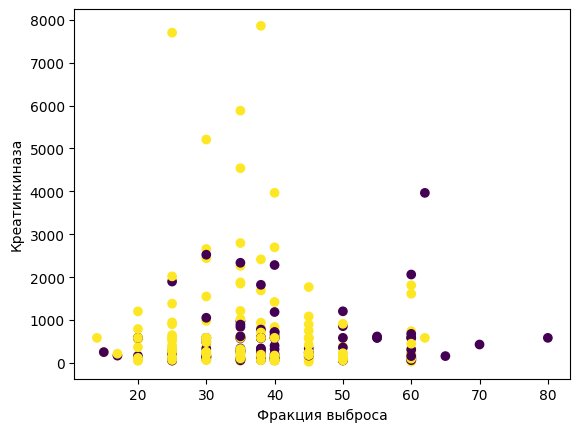

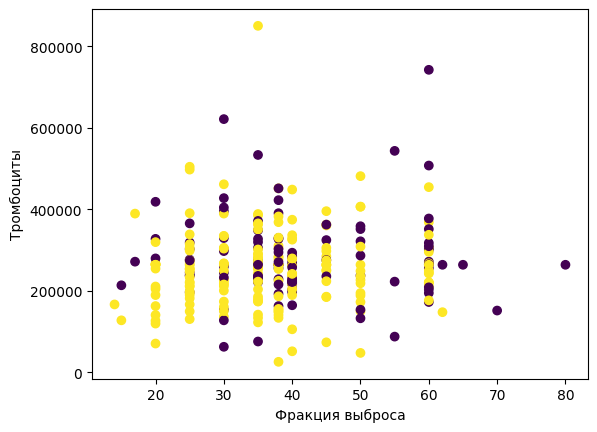

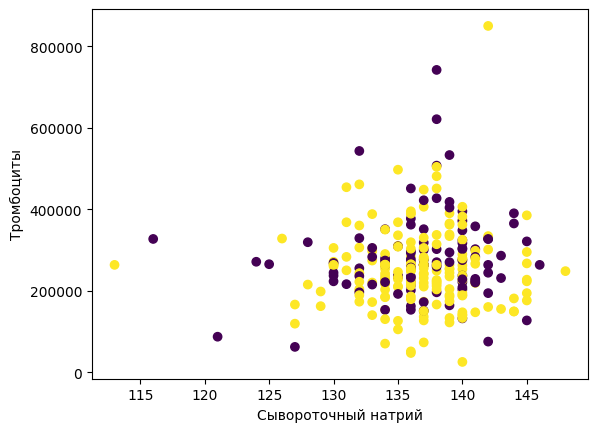

In [667]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=2, n_init=12)
clustering.fit(data)

print_graphics(df, clustering.labels_)

## Кластеризация методом к-средних (5 кластеров)

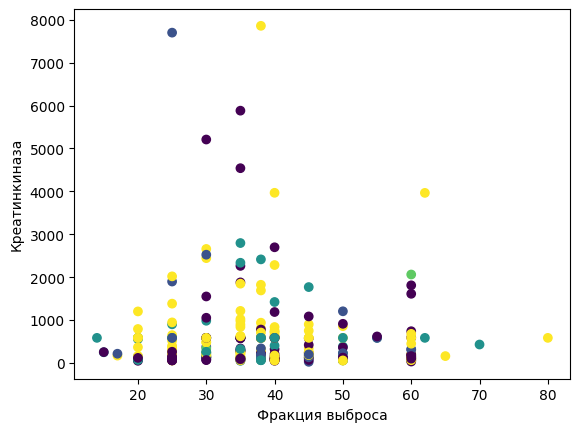

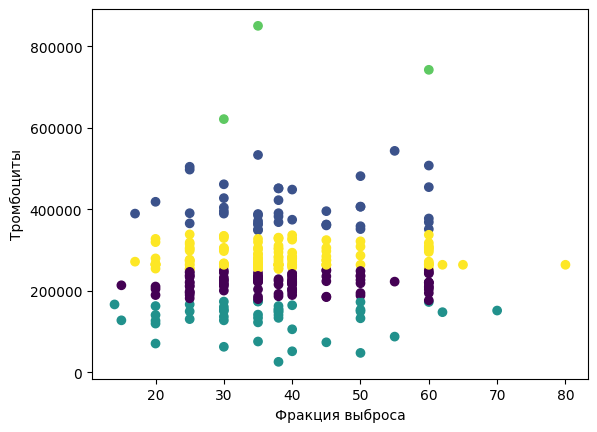

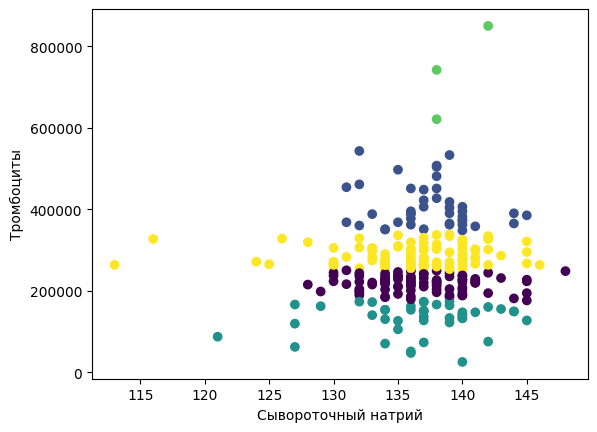

In [668]:
clustering = KMeans(n_clusters=5, n_init=20)
clustering.fit(df)

print_graphics(df, clustering.labels_)

## Кластеризация агломеративным иерархическим методом (2 кластера)

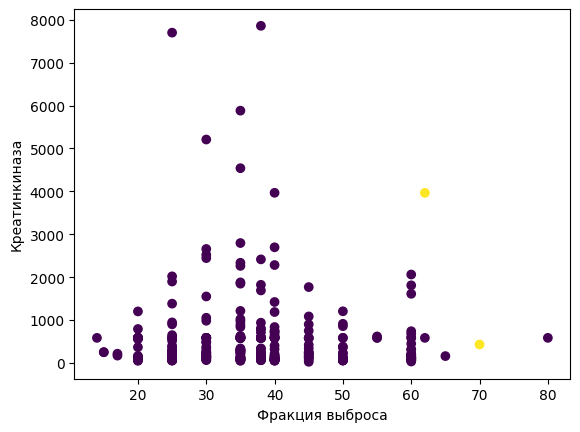

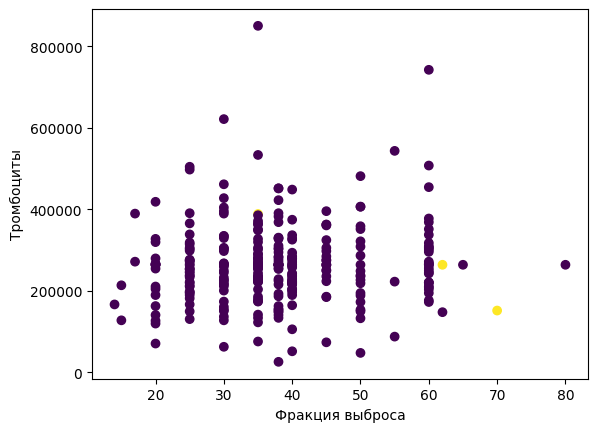

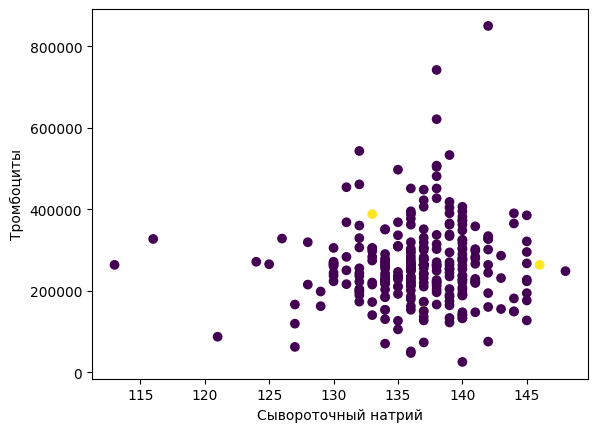

In [669]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2, metric='mahalanobis', linkage='complete')
clustering.fit(data)

print_graphics(df, clustering.labels_)

## Кластеризация агломеративным иерархическим методом (5 кластеров)

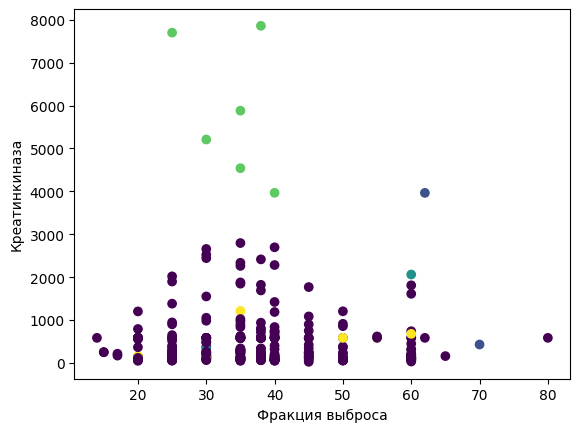

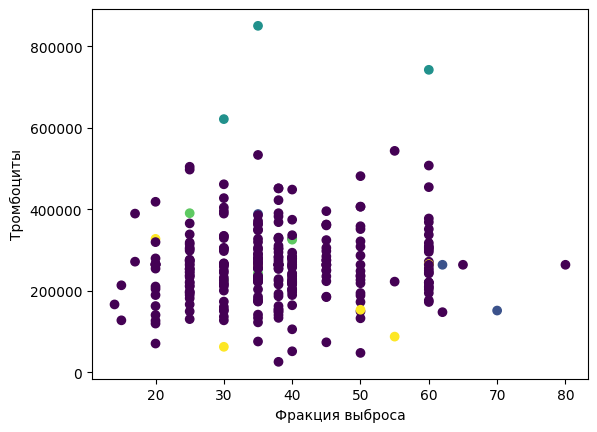

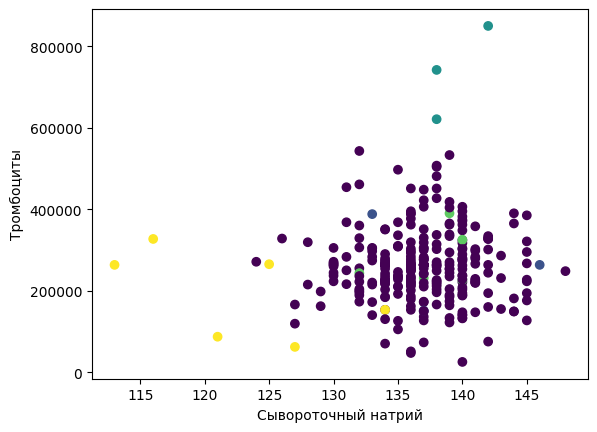

In [670]:
clustering = AgglomerativeClustering(n_clusters=5, metric='mahalanobis', linkage='complete')
clustering.fit(data)

print_graphics(df, clustering.labels_)

## Вывод

В ходе лабораторной работы были рассмотрены 2 метода кластеризации: агломеративный иерархический и k-средних. При кластеризации данных о смертности при сердечной недостаточности агломеративным методом количественный дисбаланс между элементами кластеров выше, чем при кластеризации методом k-средних.